In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from IPython.display import display
import sqlite3
from sqlalchemy import create_engine
import string
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the database file

db_conn = create_engine('sqlite:///complaints.db')
chunks = 25000
for data in pd.read_csv('complaints.csv', chunksize=chunks,
                       iterator=True, encoding='utf-8'):
    
    data = data.rename(columns={col: col.replace('-', ' ') for col in data.columns})
    data = data.rename(columns={col: col.strip() for col in data.columns})
    data = data.rename(columns={col: string.capwords(col) for col in data.columns})
    data = data.rename(columns={col: col.replace(' ', '') for col in data.columns})
    
    data.to_sql('data', db_conn, if_exists='append')

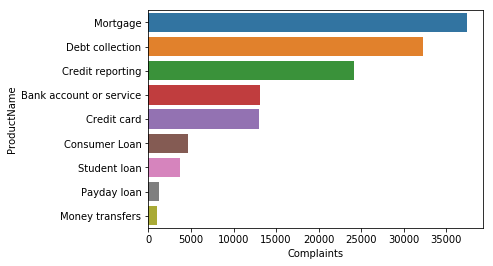

In [3]:
# Question-1
#  Which product has the most reported issues respectively in 2013, 2014 and 2015?
query1 = pd.read_sql_query('SELECT ProductName, Company, COUNT(*) as `Complaints`'
                         'FROM data '
                         'GROUP BY ProductName '
                         'ORDER BY `Complaints` DESC', db_conn)
sns.barplot(y=query1.ProductName[0:9], x=query1.Complaints[0:9])

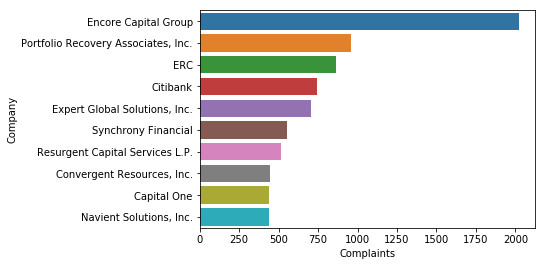

In [4]:
# Question-2
# Which company is doing best in terms of debt collection, i.e. having least number of this issue?
query2 = pd.read_sql_query('SELECT Company, COUNT(*) as `Complaints` '
                           'FROM data '
                           'WHERE ProductName = "Debt collection" '
                           'GROUP BY Company '
                           'ORDER BY `Complaints` DESC '
                           'LIMIT 10 ', db_conn)
sns.barplot(y=query2.Company, x=query2.Complaints)

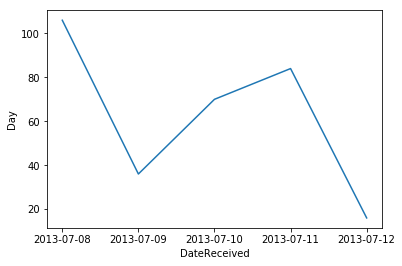

In [8]:
# Question-3
# Show the trends for issue for mortgage product from July 2013 till July 2014.
query3 = pd.read_sql_query('Select DateReceived, COUNT(*) AS `Day` '
                           'FROM data '
                           'WHERE ProductName= "Mortgage" '
                           'AND  DateReceived BETWEEN "2013-07-08" AND "2014-07-31" '
                           'GROUP BY DateReceived ', db_conn)
sns.lineplot(x=query3.DateReceived[:5], y=query3.Day[:5])

# Could not show all the dates at one go

([<matplotlib.patches.Wedge at 0x1172889b0>,
 [Text(-1.08413,-0.514458,'CA'),
  Text(0.782566,-0.773039,'FL'),
  Text(0.857697,0.688735,'TX'),
  Text(-0.354489,1.04132,'NY')],
 [Text(-0.632408,-0.300101,'36.3%'),
  Text(0.426854,-0.421658,'24.8%'),
  Text(0.467835,0.375674,'21.6%'),
  Text(-0.193358,0.56799,'17.3%')])

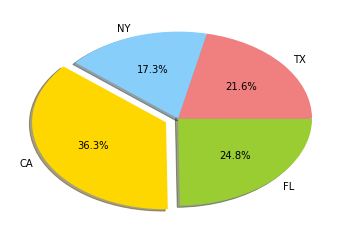

In [10]:
# Question-4
# Show the distribution of issues reporting for states using pie chart.
query4 = pd.read_sql_query('SELECT StateName, COUNT(*) AS `Issue` '
                           'FROM data '
                           'GROUP BY StateName '
                           'ORDER BY `Issue` DESC '
                           'LIMIT 4 ', db_conn)
labels = ['CA', 'FL', 'TX', 'NY']
sizes = [9198,6271,5463,4389]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

# Was not able to show all states

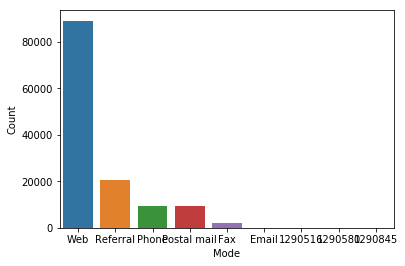

In [11]:
# Question-5
# Which mode of report issuing became popular from 2013 to 2015 and 
# which one got declined (assume one quarter as the reference time-period).
query5 = pd.read_sql_query('SELECT DateReceived, SubmittedVia AS `Mode`, COUNT(*) AS `Count` '
                           'FROM data '
                           'GROUP BY SubmittedVia '
                           'ORDER BY `Count` DESC '
                           'LIMIT 10 ',db_conn)
sns.barplot(x=query5.Mode, y=query5.Count)